In [1]:
import pandas as pd
import numpy as np


In [61]:
x=pd.read_excel("/content/output.xlsx")

In [62]:
print(x)

        _unit_id  ...  which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0      694550568  ...                       He is smiling. => happy, joy                             
1      694550569  ...                   A beautiful scenery. => serenity                             
2      694550570  ...                They look serious. => sadness, fear                             
3      694550571  ...                        A cute puppy. => happy, joy                             
4      694550572  ...                  She looks fun. => fun, joy, happy                             
...          ...  ...                                                ...                             
12592  694566359  ...                                                NaN                             
12593  694566362  ...                                                NaN                             
12594  694566363  ...                                                NaN          

In [63]:
x.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,which_of_these_sentiment_scores_does_the_above_image_fit_into_best,which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence,imageurl,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0,694550568,True,golden,47,NaN,Positive,0.6395,http://farm1.staticflickr.com/20/71235476_3103...,Highly positive\nPositive,"He is smiling. => happy, joy"
1,694550569,True,golden,36,NaN,Positive,0.6458,http://farm4.staticflickr.com/3096/2584485524_...,Highly positive\nPositive,A beautiful scenery. => serenity
2,694550570,True,golden,35,NaN,Negative,0.8420,http://farm3.staticflickr.com/2880/11733997835...,Negative\nHighly negative,"They look serious. => sadness, fear"
3,694550571,True,golden,41,NaN,Positive,0.7216,http://farm4.staticflickr.com/3022/2286937150_...,Highly positive\nPositive,"A cute puppy. => happy, joy"
4,694550572,True,golden,46,NaN,Positive,0.8801,http://farm1.staticflickr.com/163/357381033_d0...,Highly positive\nPositive,"She looks fun. => fun, joy, happy"


In [64]:
SentimenScores=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence"]
Sentiments=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best"]
imageUrl=x["imageurl"]
SentimentGold=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold"]

In [65]:
import urllib.request

k=0
url=[]
for i in range(len(imageUrl)):
  url.append("/content//Untitled Folder/"+str(i)+".jpg")
  #urllib.request.urlretrieve(imageUrl[i], "/content/Untitled Folder/"+str(i)+".jpg")
  if(i%100==0):
    print(i)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500


In [66]:
X=url
Y=Sentiments

In [67]:
Y[Y=="Highly positive"]=int(4)
Y[Y=="Positive"]=int(3)
Y[Y=="Neutral"]=int(2)
Y[Y=="Negative"]=int(1)
Y[Y=="Highly negative"]=int(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [68]:
Y

0        3
1        3
2        1
3        3
4        3
        ..
12592    3
12593    3
12594    3
12595    3
12596    3
Name: which_of_these_sentiment_scores_does_the_above_image_fit_into_best, Length: 12597, dtype: object

In [70]:
Y=pd.to_numeric(Y, errors='coerce').fillna(0, downcast='infer')


In [71]:
X_new=[]
Y_new=[]
j=0
k=0
m=0
l=0
for i in range(len(X)):
  if(Y[i]==3):
    j=j+1
  if(Y[i]==2):
    k=k+1
  if(Y[i]==1):
    m=m+1
  if(Y[i]==4):
    l=l+1
  if(j<=250 and Y[i]==3):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(k<=250 and Y[i]==2):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(m<=250 and Y[i]==1):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(l<=250 and Y[i]==4):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(Y[i]==0):
    Y_new.append(Y[i])
    X_new.append(X[i])

In [72]:
import matplotlib.pyplot as plt


(array([256.,   0., 250.,   0.,   0., 250.,   0., 250.,   0., 250.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

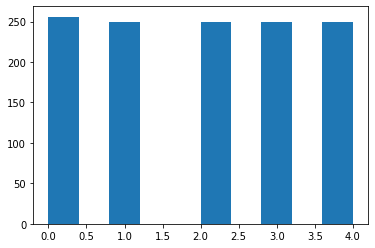

In [73]:
plt.hist(Y_new)

In [74]:
X=X_new
Y=Y_new

In [75]:
Y=np.array(Y)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test2, Y_train, Y_test2 = train_test_split(X,Y)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test2,Y_test2)



In [77]:
from PIL import Image

import torchvision.transforms as transforms

#--- Transformamos los datos para adaptarlos a la entrada de ResNet 224x224 px
data_transform = transforms.Compose([
                 transforms.Resize((224, 224)),
                 transforms.Grayscale(3), #Dado que MNIST tiene un solo canal, lo cambiamos a 3 para no tener que modificar más capas en el modelo
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])

In [19]:
 a=np.array(data_transform(Image.open(X_train[0])) )

In [20]:
Y_test2[0]

0

In [78]:
X_trainArr=[]

for i in X_train[:int(len(X_train))]:

  X_trainArr.append( np.array(data_transform(Image.open(i)) ))

In [79]:
X_testArr=[]
for i in X_test[:int(len(X_test))]:
  Y
  X_testArr.append( np.array(data_transform(Image.open(i)) ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


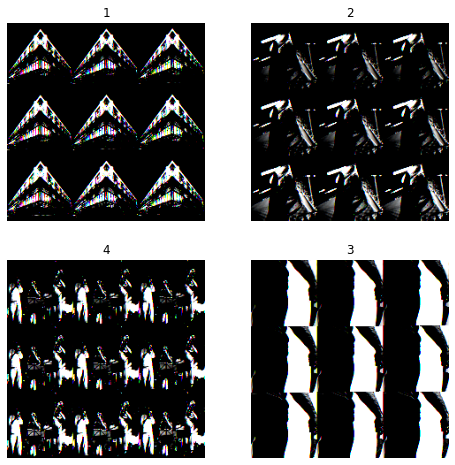

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(X_testArr[i*15].reshape(224,224,3))
  plt.title(str(Y_test2[i*15]))
  plt.axis(False)
plt.show()

In [24]:
Y_train=Y_train[:int(len(Y_train))]
Y_test=Y_test[:int(len(Y_test))]
Y_valid=Y_valid[:int(len(Y_valid))]


In [81]:
len(Y_train)

942

In [82]:
X_validArr=[]
for i in X_valid[:int(len(X_valid)*0.5)]:
  X_validArr.append( np.array(data_transform(Image.open(i)) ))

In [83]:
#--- Convetimos las listas con los datos a tensores de torch
import torch
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_trainArr))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train)).long())

X_test = Variable(torch.from_numpy(np.array(X_testArr))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([942, 3, 224, 224])

In [84]:
Y_train

tensor([4, 1, 3, 0, 4, 3, 0, 2, 1, 4, 4, 2, 4, 2, 2, 1, 0, 4, 4, 0, 4, 3, 1, 1,
        0, 0, 4, 2, 1, 4, 0, 1, 2, 1, 2, 4, 3, 0, 2, 4, 2, 3, 0, 0, 3, 2, 2, 3,
        1, 4, 4, 3, 2, 1, 1, 4, 0, 4, 3, 4, 3, 2, 4, 0, 3, 0, 4, 4, 0, 4, 2, 1,
        0, 4, 1, 0, 3, 4, 3, 1, 3, 0, 2, 1, 2, 3, 0, 4, 1, 0, 3, 1, 1, 1, 3, 3,
        1, 3, 0, 0, 2, 3, 0, 2, 4, 3, 1, 2, 2, 0, 1, 2, 4, 3, 4, 1, 0, 4, 0, 1,
        1, 1, 0, 0, 4, 0, 0, 3, 0, 3, 2, 4, 3, 4, 3, 0, 0, 2, 3, 2, 2, 3, 1, 2,
        2, 1, 3, 4, 3, 3, 3, 1, 1, 0, 0, 3, 3, 1, 0, 1, 1, 1, 2, 0, 4, 4, 0, 2,
        4, 1, 1, 4, 3, 0, 0, 0, 2, 4, 1, 0, 2, 0, 1, 1, 2, 4, 1, 0, 1, 0, 1, 2,
        3, 4, 4, 4, 3, 4, 4, 3, 3, 2, 3, 2, 3, 1, 4, 4, 3, 2, 1, 4, 4, 3, 1, 1,
        3, 2, 2, 3, 4, 1, 0, 3, 3, 1, 4, 3, 0, 2, 3, 2, 1, 2, 1, 2, 2, 1, 0, 3,
        0, 1, 2, 4, 3, 3, 1, 3, 3, 1, 2, 2, 2, 1, 2, 1, 4, 3, 1, 3, 4, 0, 0, 3,
        4, 2, 2, 0, 2, 2, 1, 0, 1, 3, 2, 1, 4, 2, 1, 4, 4, 1, 3, 4, 1, 1, 3, 4,
        2, 1, 4, 1, 3, 3, 1, 1, 2, 1, 0,

In [85]:

batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
del train_ds

In [86]:
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)

In [87]:
model=vgg16

In [88]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [89]:
for p in model.parameters():
    p.requires_grad = False

#--- Definimos el número de clases
out_dim = 10

#--- Reescribimos la nueva capa de salida con el nuevo dataset
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=25088, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=1000, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=1000, out_features=5, bias=True))


model.load_state_dict(model.state_dict())

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [90]:
!pip install hiddenlayer
import hiddenlayer as hl

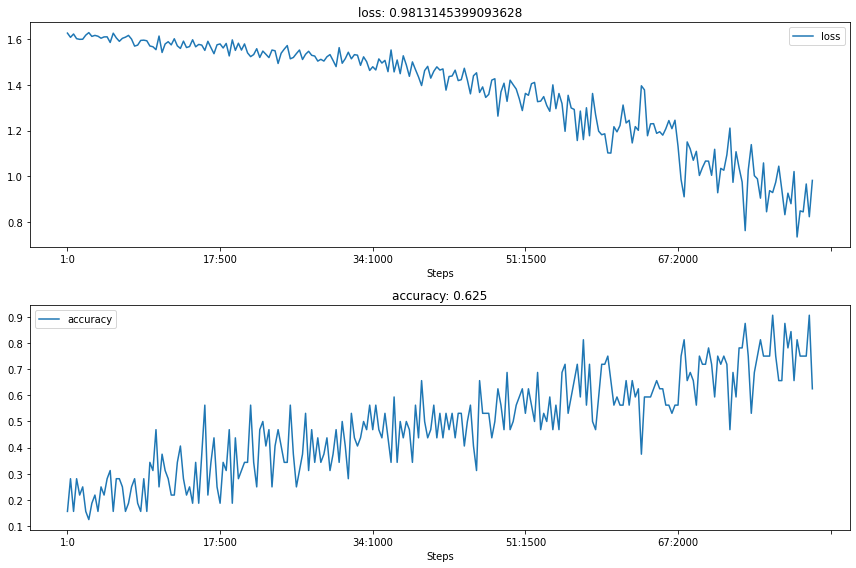

In [ ]:
#--- Creamos variables para almacenar los scores en cada época 
from sklearn.metrics import f1_score

model = model.cuda()

model.train()

#--- Definimos nuestro criterio de evaluación y el optimizador 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss()


#--- Entrenamos el modelo usando únicamente 5 épocas
n_epochs = 100

history = hl.History()
canvas = hl.Canvas()

iter = 0

for epoch in range(n_epochs):
  for batch_idx, (X_train_batch, Y_train_batch) in enumerate(train_dl):
    # Pasamos os datos a 'cuda'

    X_train_batch = X_train_batch.cuda()
    Y_train_batch = Y_train_batch.cuda()

    # Realiza una predicción
    Y_pred = model(X_train_batch)
    # Calcula el loss
    loss = criterion(Y_pred, Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)

    # Calcula el accuracy
    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter%10 == 0:
        #-- Visualizamos la evolución de los score loss y accuracy
        history.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["accuracy"])

    iter += 1
    del X_train_batch, Y_train_batch, Y_pred


In [58]:
  #-- Validamos el modelo
from sklearn.metrics import f1_score

model.cpu()
model.eval()

Y_pred = model(X_test)
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:1.30, F1:0.44, Acc:0.46


In [54]:
#--- Guardamos el nuevo Modelo
torch.save(model,"/content/Modelo.pt")

torch.save(model.state_dict(), "/content/Modelostatedict.pt")

In [59]:
from sklearn.metrics import confusion_matrix

def CM(Y_true, Y_pred, classes, lclasses=None):
  fig = plt.figure(figsize=(10, 10))
  cm = confusion_matrix(Y_true, Y_pred)
  if lclasses == None:
    lclasses = np.arange(0,classes)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  plt.show()

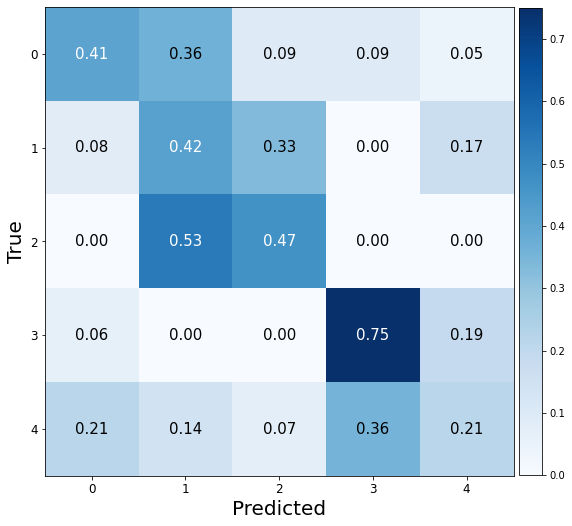

In [60]:
CM(Y_test, Y_pred, 5)

In [ ]:
Y_pred

tensor([4, 2, 3, 3, 3, 4, 1, 4, 4, 2, 1, 3, 3, 3, 2, 4, 3, 2, 4, 1, 4, 1, 4, 2,
        1, 3, 3, 3, 4, 3, 3, 1, 2, 4, 1, 3, 1, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2,
        3, 4, 2, 4, 2, 1, 3, 0, 2, 3, 1, 3, 4, 3, 2, 3, 1, 2, 2, 1, 4, 2, 3, 2,
        4, 4, 4, 1, 1, 3, 4, 2, 2, 3, 3, 3, 3, 4, 2, 3, 2, 2, 4, 3, 4, 4, 3, 3,
        1, 3, 2, 3, 4, 3, 3, 4, 4, 4, 4])